# Data Visualization on "FiveThirtyEight Comic Characters Dataset"

![title](pic.jpg)

### Data Source: https://www.kaggle.com/fivethirtyeight/fivethirtyeight-comic-characters-dataset

---

### Importing required librarires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing the necessary two different data files of `DC` and `Marvel` comics.

In [2]:
dc = pd.read_csv('dc-wikia-data.csv')
marvel = pd.read_csv('marvel-wikia-data.csv')

In [3]:
dc.head(2)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0


In [4]:
marvel.head(2)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0


In [5]:
print('Shape of DC dataset is', dc.shape,'.' '\nShape of Marvel dataset is', marvel.shape,'.')

Shape of DC dataset is (6896, 13) .
Shape of Marvel dataset is (16376, 13) .


### Dropping unneccary columns regarding only for visualization.

In [6]:
dc.drop(['page_id', 'urlslug', 'FIRST APPEARANCE'], axis = 1, inplace = True)
marvel.drop(['page_id', 'urlslug', 'FIRST APPEARANCE'], axis = 1, inplace = True)

### Creating new columns to identify the character from `DC` or `Marvel` universe. (When we will merge the two datasets together, later)

In [7]:
dc['UNIVERSE'] = 'DC'
marvel['UNIVERSE'] = 'Marvel'

In [8]:
print ('Shape of DC dataset is', dc.shape, '\nShape of Marvel dataset is', marvel.shape)

Shape of DC dataset is (6896, 11) 
Shape of Marvel dataset is (16376, 11)


### We only need the superhero name, not the actual real name. Hence, applying the code.

In [9]:
dc['name'] = dc['name'].apply(lambda x: x.split('(')[0])
marvel['name'] = marvel['name'].apply(lambda x: x.split('(')[0])

### In DC dataset, column `YEAR` is named as `Year` only, but in Marvel dataset, it is in lowercase.

In [10]:
marvel.rename(columns = {'Year': 'YEAR'}, inplace = True)

In [11]:
dc.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 11 columns):
name           6896 non-null object
ID             4883 non-null object
ALIGN          6295 non-null object
EYE            3268 non-null object
HAIR           4622 non-null object
SEX            6771 non-null object
GSM            64 non-null object
ALIVE          6893 non-null object
APPEARANCES    6541 non-null float64
YEAR           6827 non-null float64
UNIVERSE       6896 non-null object
dtypes: float64(2), object(9)
memory usage: 3.7 MB


In [12]:
marvel.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 11 columns):
name           16376 non-null object
ID             12606 non-null object
ALIGN          13564 non-null object
EYE            6609 non-null object
HAIR           12112 non-null object
SEX            15522 non-null object
GSM            90 non-null object
ALIVE          16373 non-null object
APPEARANCES    15280 non-null float64
YEAR           15561 non-null float64
UNIVERSE       16376 non-null object
dtypes: float64(2), object(9)
memory usage: 8.7 MB


In [13]:
for column in dc.columns:
    print ('----------- %s -----------' % column)
    print (dc[column].value_counts())
    print('\n')

----------- name -----------
Ragnar              2
Bito Wladon         2
Todd Rice           2
Matthew Ryder       2
Adara               2
                   ..
Major Hubert        1
Caldwell Dayzl      1
Jonathan Mayhew     1
Sandalphon          1
Perdoo              1
Name: name, Length: 6879, dtype: int64


----------- ID -----------
Public Identity     2466
Secret Identity     2408
Identity Unknown       9
Name: ID, dtype: int64


----------- ALIGN -----------
Bad Characters        2895
Good Characters       2832
Neutral Characters     565
Reformed Criminals       3
Name: ALIGN, dtype: int64


----------- EYE -----------
Blue Eyes             1102
Brown Eyes             879
Black Eyes             412
Green Eyes             291
Red Eyes               208
White Eyes             116
Yellow Eyes             86
Photocellular Eyes      48
Grey Eyes               40
Hazel Eyes              23
Purple Eyes             14
Violet Eyes             12
Orange Eyes             10
Gold Eyes       

In [14]:
for column in marvel.columns:
    print ('----------- %s -----------' % column)
    print (marvel[column].value_counts())
    print('\n')

----------- name -----------
Charlie                 10
Peter Parker            10
Charles Xavier           7
Reed Richards            7
James Madrox             7
                        ..
Maggott                  1
Non-Newtonian Annie      1
Arnie Roth               1
Ahpuch                   1
Donovan Gorman           1
Name: name, Length: 15363, dtype: int64


----------- ID -----------
Secret Identity                  6275
Public Identity                  4528
No Dual Identity                 1788
Known to Authorities Identity      15
Name: ID, dtype: int64


----------- ALIGN -----------
Bad Characters        6720
Good Characters       4636
Neutral Characters    2208
Name: ALIGN, dtype: int64


----------- EYE -----------
Blue Eyes          1962
Brown Eyes         1924
Green Eyes          613
Black Eyes          555
Red Eyes            508
White Eyes          400
Yellow Eyes         256
Grey Eyes            95
Hazel Eyes           76
Variable Eyes        49
Purple Eyes          

### Countplot on the basis of identity status of the character.

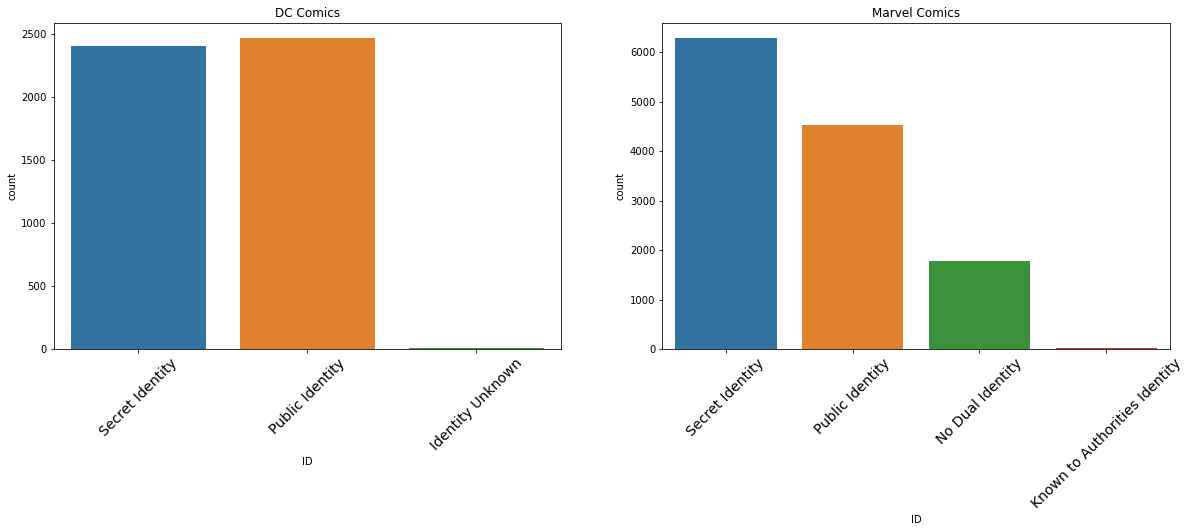

In [15]:
plt.figure(figsize = (20,6))

plt.subplot(1, 2, 1)
sns.countplot(x = 'ID', data = dc)
plt.xticks(rotation = 45, fontsize = 14)
plt.title('DC Comics')

plt.subplot(1, 2, 2)
sns.countplot(x = 'ID', data = marvel)
plt.xticks(rotation = 45, fontsize = 14)
plt.title('Marvel Comics');

### Countplot on the basis of whether the character is Good, Bad or Neutral.

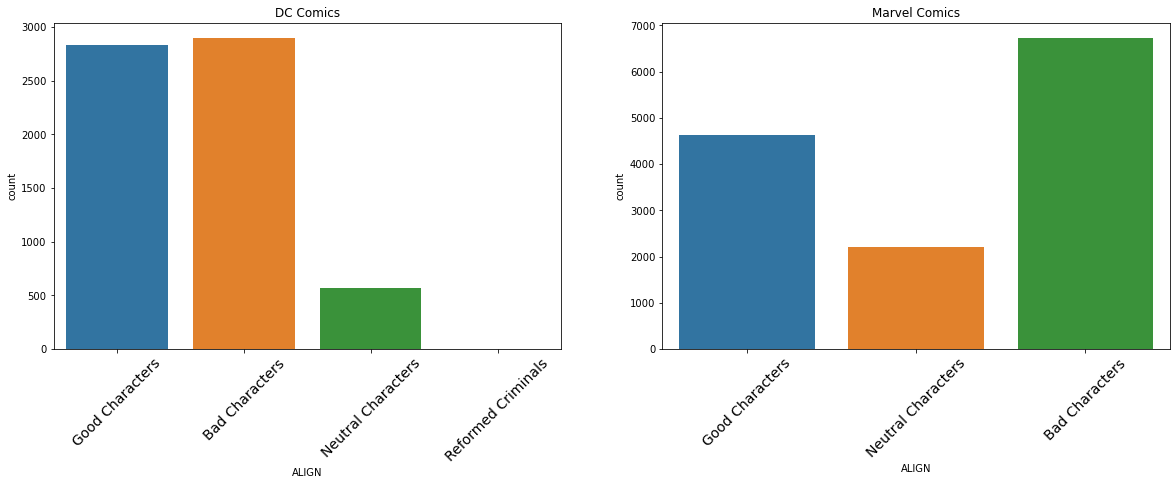

In [16]:
plt.figure(figsize = (20,6))

plt.subplot(1, 2, 1)
sns.countplot(x = 'ALIGN', data = dc)
plt.xticks(rotation = 45, fontsize = 14)
plt.title('DC Comics')

plt.subplot(1, 2, 2)
sns.countplot(x = 'ALIGN', data = marvel)
plt.xticks(rotation = 45, fontsize = 14)
plt.title('Marvel Comics');

### Trying pie chart on the basis of whether the character is Good, Bad or Neutral.

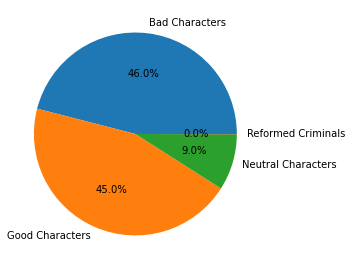

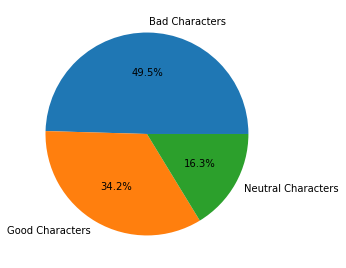

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.pie(dc['ALIGN'].value_counts().values, labels = dc['ALIGN'].value_counts().index, autopct='%1.1f%%')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 2)
plt.pie(marvel['ALIGN'].value_counts().values, labels = marvel['ALIGN'].value_counts().index, autopct='%1.1f%%')
plt.show();

### Heatmaps

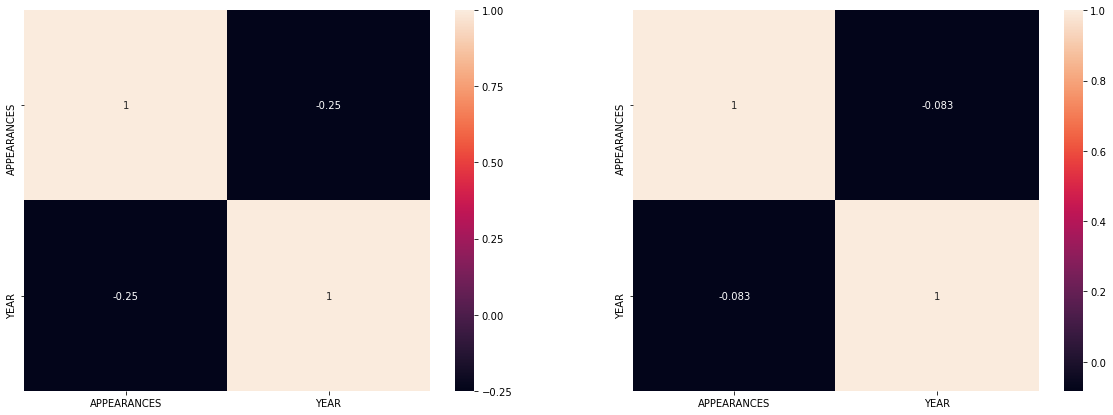

In [18]:
plt.figure(figsize = (20, 7))
plt.subplot(1, 2, 1)
sns.heatmap(dc.corr(), annot = True)

plt.subplot(1, 2, 2)
sns.heatmap(marvel.corr(), annot = True);

### Concatenating both the data sets together.

In [19]:
main_data = pd.concat([dc, marvel])

In [20]:
main_data.head()

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,YEAR,UNIVERSE
0,Batman,Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,1939.0,DC
1,Superman,Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,1986.0,DC
2,Green Lantern,Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,1959.0,DC
3,James Gordon,Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,1987.0,DC
4,Richard Grayson,Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,1940.0,DC


In [21]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23272 entries, 0 to 16375
Data columns (total 11 columns):
name           23272 non-null object
ID             17489 non-null object
ALIGN          19859 non-null object
EYE            9877 non-null object
HAIR           16734 non-null object
SEX            22293 non-null object
GSM            154 non-null object
ALIVE          23266 non-null object
APPEARANCES    21821 non-null float64
YEAR           22388 non-null float64
UNIVERSE       23272 non-null object
dtypes: float64(2), object(9)
memory usage: 2.1+ MB


In [22]:
main_data.describe()

,APPEARANCES,YEAR
count,21821.000000,22388.000000
mean,19.009303,1986.420046
std,93.814040,18.972698
min,1.000000,1935.000000
25%,1.000000,1976.000000
50%,4.000000,1990.000000
75%,10.000000,2001.000000
max,4043.000000,2013.000000


In [23]:
main_data.isnull().sum()

name               0
ID              5783
ALIGN           3413
EYE            13395
HAIR            6538
SEX              979
GSM            23118
ALIVE              6
APPEARANCES     1451
YEAR             884
UNIVERSE           0
dtype: int64

### Distribution plot of the appearances.

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


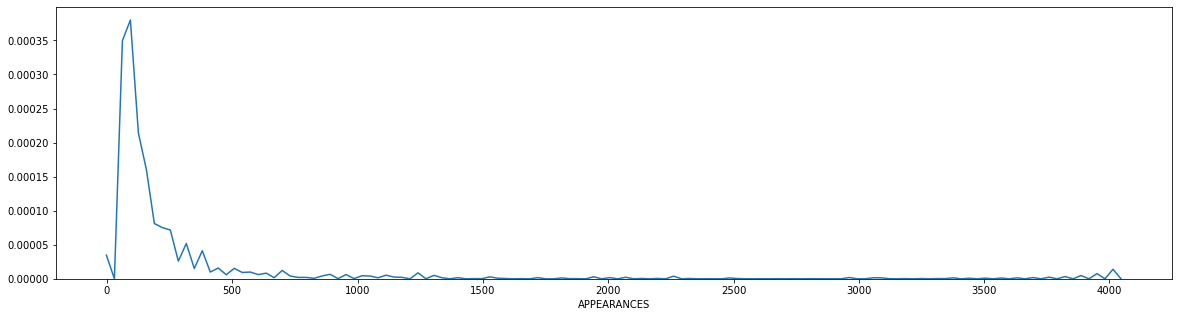

In [24]:
plt.figure(figsize = (20, 5))
sns.distplot(main_data['APPEARANCES'], hist = False, bins = 1);

### `Kernel Density Estimate(KDE)` plot of the appearances on the basis of `UNIVERSE`

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


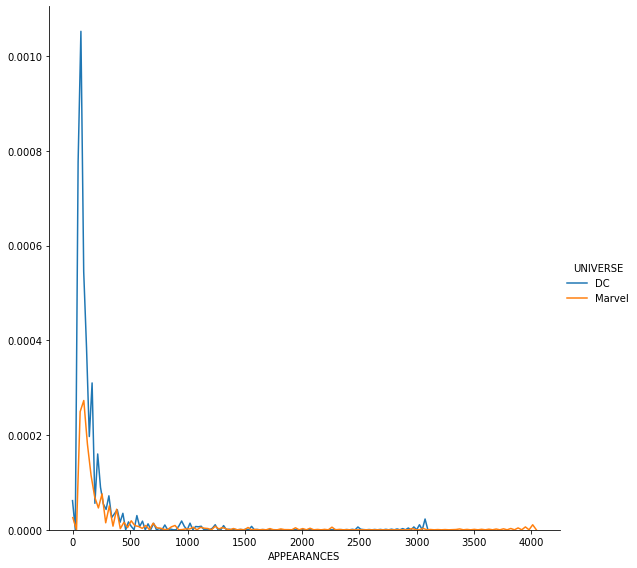

In [25]:
sns.FacetGrid(main_data, hue = 'UNIVERSE', size = 8).map(sns.kdeplot, 'APPEARANCES').add_legend()
plt.show();

In [26]:
main_data.shape

(23272, 11)

### Since, the dataset is very huge with rows 23,272 for my machine to create visualizations. Hence, I will make plots on the sample created by this dataset.

In [27]:
sample_data = main_data.sample(frac = 0.05)

### Swarmplot

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


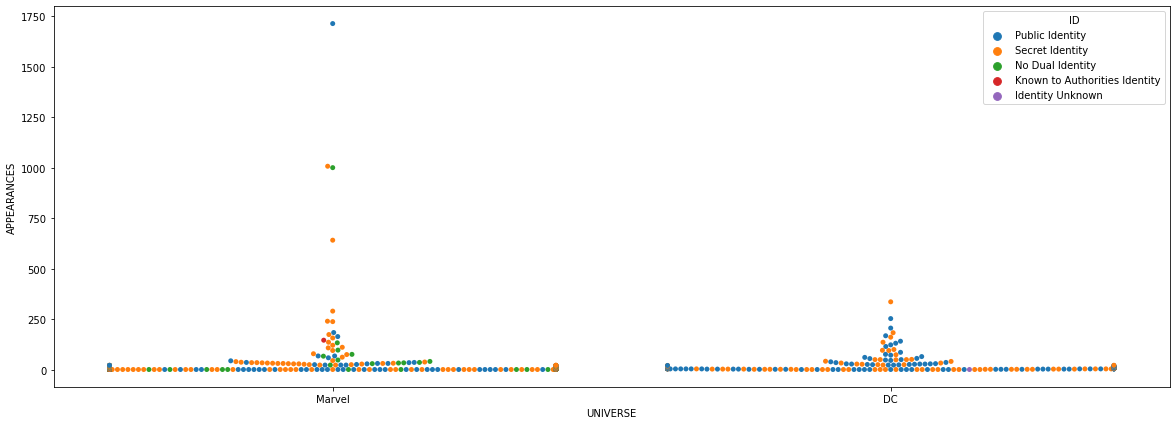

In [28]:
plt.figure(figsize = (20, 7))
sns.swarmplot(x = 'UNIVERSE', y = 'APPEARANCES', hue = 'ID', data = sample_data);

### Boxplot on identity status and appearances.

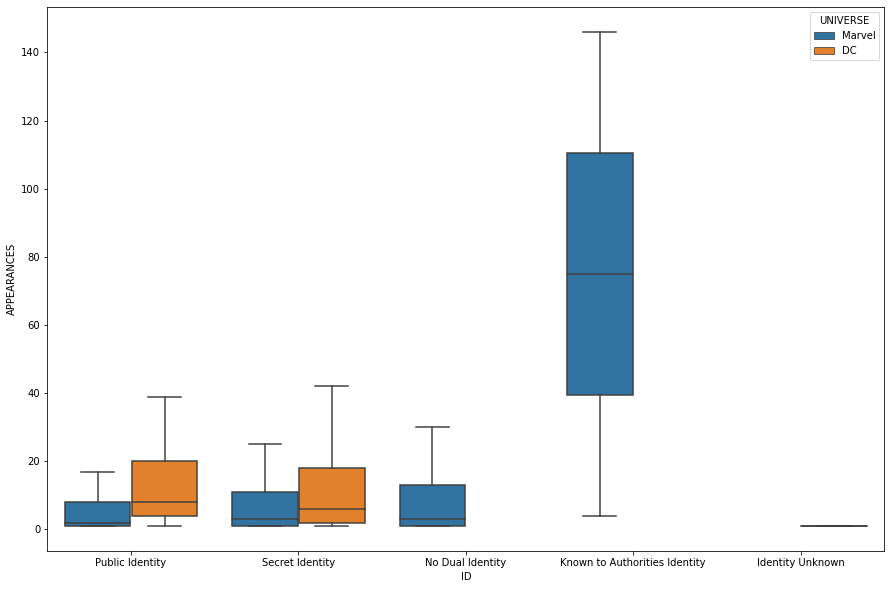

In [29]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'ID', y = 'APPEARANCES', hue = 'UNIVERSE', data = sample_data, showfliers = False);

### Boxplot on character trait and appearances.

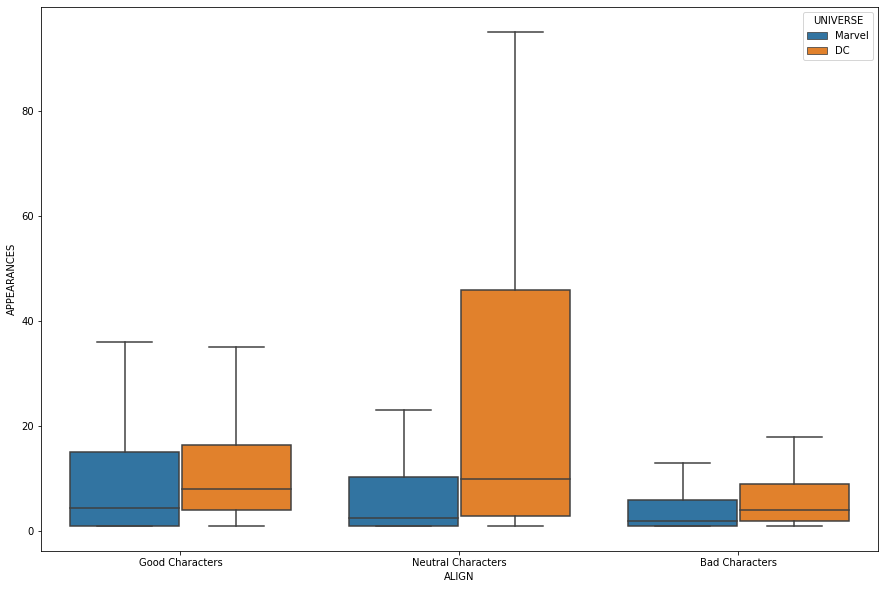

In [30]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'ALIGN', y = 'APPEARANCES', hue = 'UNIVERSE', data = sample_data, showfliers = False);

### Boxplot on gender and appearances.

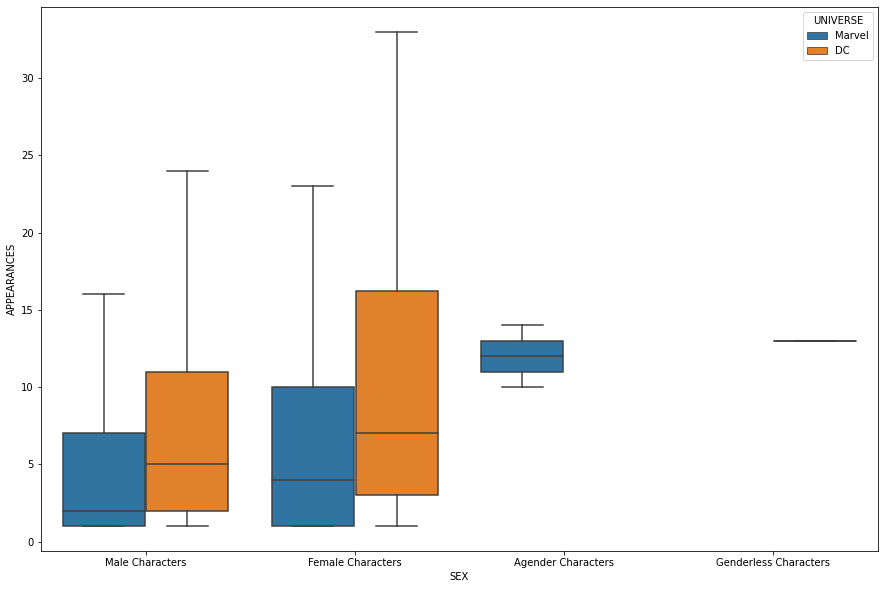

In [31]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'SEX', y = 'APPEARANCES', hue = 'UNIVERSE', data = sample_data, showfliers = False);

### Boxplot on living status and appearances.

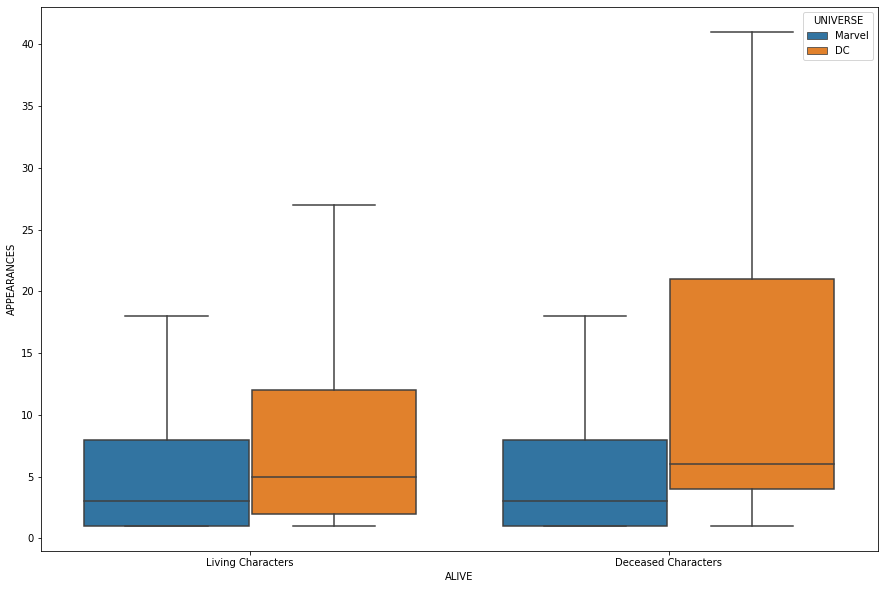

In [32]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'ALIVE', y = 'APPEARANCES', hue = 'UNIVERSE', data = sample_data, showfliers = False);